# <center> <u> **Proyecto final</u>: Identificación de textos de acuerdo a su área científica, física, biología o química.**

> ## <center> Andrés Adrián Vargas Sánchez, Alejandra Irene Hinostroza Caldas

### <center> **Temas Selectos de Física Computacional**
#### <center> Semestre 2023-2
##### <center> **07/06/2023**


Los datos se encuentran en [Kaggle](https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology) bajo el titulo **Physics vs Chemistry vs Biology**. Los datos de texto se recolectaron de reddit.com.

### Detalles del dataset
- 3 clases: Physics, Chemistry, and Biology.
- Numero total de muestras: 10281 comentarios.


_________________

In [1]:
# montamos drive si es necesario
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importamos dataset desde google drive
import pandas as pd

# desde drive
path_train = '/content/drive/MyDrive/dl-intro/train.csv'
path_test  = '/content/drive/MyDrive/dl-intro/test.csv' 

# # desde archivos locales
# path_train = './dataset/train.csv'
# path_test  = './dataset/test.csv'

df_train = pd.read_csv(path_train)
df_test  = pd.read_csv(path_test)

In [3]:
# mostramos parte del dataset
df_train

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [4]:
df_test

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics
...,...,...,...
1581,0x22bf,I’m not really denying your intent. I’m a) dou...,Chemistry
1582,0x1f4a,i really empathize with your compassion for bu...,Biology
1583,0x27b7,"If you want to keep it for more than 2 weeks, ...",Chemistry
1584,0x2066,Same here. I’m in nursing school so I only hav...,Biology


In [5]:
# mostramos una de las filas del dataset de entrenamiento
def print_comment(index, df):
  print('El comentario del Id', df.loc[index,'Id'], ':')
  print(df.loc[index,'Comment'])
  print('Es de la rama de', df.loc[index,'Topic'])

print_comment(index=1, df=df_train)

El comentario del Id 0xbf0 :
Is it so hard to believe that there exist particulars out that that we can't detect with anything we've invented so far.\n\nI mean look how long it took humans to find out a way to detect radiation.
Es de la rama de Physics


[]

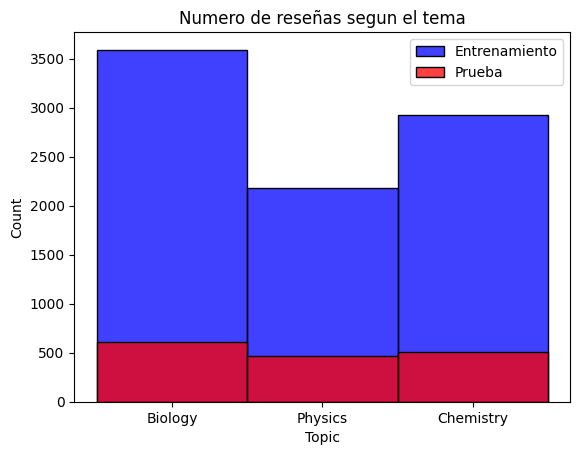

In [6]:
# nuestra primera observación es que se tiene una mayor cantidad de datos con Topic: Biology
import matplotlib.pyplot as plt
import seaborn as sns

# histograma de los tipos de libro para los conjuntos de entrenamiento y prueba
fig, ax = plt.subplots()
sns.histplot(data=df_train, x='Topic', color='blue', label='Entrenamiento', ax=ax)
sns.histplot(data=df_test, x='Topic', color='red', label='Prueba', ax=ax)
plt.legend()
plt.title('Numero de reseñas segun el tema')
plt.plot()

# Preprocesamiento de los datos
El preprocesamiento de datos es una etapa esencial en la construcción de un modelo de clasificación de textos. Implica la aplicación de una serie de técnicas y transformaciones a los datos textuales antes de alimentarlos al modelo.

A continuación se especifican los pasos considerados en este proceso.

## Limpieza de datos
Los datos textuales suelen contener ruido y elementos innecesarios, como signos de puntuación, caracteres especiales, números y palabras vacías. El preprocesamiento permite eliminar o filtrar estos elementos no deseados para obtener un conjunto de datos limpio.

### Normalización de texto

La normalización implica la estandarización de diferentes variantes de palabras. Por ejemplo, RADIATION y Radiation deben tratados como el mismo tipo de palabra. Para ello pondremos todas las palabras en minúsculas.

In [7]:
# creamos copias de los datasets de entrenamiento y prueba
# para almacenar las versiones filtradas de los dataset
df_train_filt = df_train.copy()
df_test_filt = df_test.copy()

In [8]:
# colocamos en minusculas todas las palabras de los comentarios
df_train_filt['Comment'] = df_train['Comment'].str.lower()
df_test_filt['Comment']  = df_test['Comment'].str.lower()

In [9]:
# mostramos una de las filas del dataset de entrenamiento
print_comment(index=1, df=df_train_filt)

El comentario del Id 0xbf0 :
is it so hard to believe that there exist particulars out that that we can't detect with anything we've invented so far.\n\ni mean look how long it took humans to find out a way to detect radiation.
Es de la rama de Physics


### Removemos \n

Revisando algunos de los comentarios (como el mostrado anteriormente) notamos que aparecen términos como '\n' (representan saltos de línea) que deben ser eliminados de los comentarios.

In [10]:
# esta función reemplaza '\n' del string x por un espacio en blanco
def remove_newlines(x):
    return x.replace('\\n', ' ')

# aplicamos esta función a la columna Comment de los dataset filtrados
df_train_filt['Comment'] = df_train_filt['Comment'].apply(remove_newlines)
df_test_filt['Comment'] = df_test_filt['Comment'].apply(remove_newlines)

In [11]:
# mostramos el resultado en una de las filas del dataset de entrenamiento
print_comment(index=1, df=df_train_filt)

El comentario del Id 0xbf0 :
is it so hard to believe that there exist particulars out that that we can't detect with anything we've invented so far.  i mean look how long it took humans to find out a way to detect radiation.
Es de la rama de Physics


### Dividimos los enlaces
Algunos de los comentarios incluyen enlaces. Si bien podríamos optar por omitir esos comentarios, notamos que algunos de ellos presentan palabras claves para clasificar los libros en el enlace mismo. Así resulta más conveniente dividir el enlace en sus palabras constituyentes.

In [12]:
# uno de los comentarios con enlace es
print_comment(index=117, df=df_train_filt)

El comentario del Id 0x221f :
here u go     https://www.khanacademy.org/science/physics/linear-momentum/elastic-and-inelastic-collisions/a/what-are-elastic-and-inelastic-collisions#:\~:text=an%20elastic%20collision%20is%20a,conserved%20quantities%20in%20elastic%20collisions.&text=this%20collision%20is%20perfectly%20elastic%20because%20no%20energy%20has%20been%20lost.
Es de la rama de Physics


In [13]:
# importamos el módulo de expresiones regulares
import re

# esta función busca un link/enlace en el string x, y si lo encuentra lo divide
# en sus palabras constituyentes 
def split_link(x):
    # elimina 'https://www.' del string
    string = re.sub(r'https?://(www\.)?', '', x)
    # reemplaza los caracteres indicados en el primer argumento por un espacio en blanco
    string = re.sub(r'[/.-/#:=%,&\~]', ' ', string)
    return string

# aplicamos esta funcion sobre la columa Comment
df_train_filt['Comment'] = df_train_filt['Comment'].apply(split_link)
df_test_filt['Comment'] = df_test_filt['Comment'].apply(split_link)

In [14]:
# mostramos el resultado sobre el comentario anterior
print_comment(index=1015, df=df_train_filt)

El comentario del Id 0x556 :
en m wikipedia org wiki chain_of_command_(star_trek _the_next_generation)
Es de la rama de Physics


Eliminamos algunos tipos de caracteres que suelen aparecer en los url.

In [15]:
url_char = ['_', '-', '%', '.', '=', ':']

def remove_url_characters(x):
    for c in url_char:
        x = x.replace(c, ' ')
    return x

# aplicamos esta funcion sobre la columa Comment
df_train_filt['Comment'] = df_train_filt['Comment'].apply(remove_url_characters)
df_test_filt['Comment'] = df_test_filt['Comment'].apply(remove_url_characters)

### Eliminar signos de puntuación y otros caracteres

Queremos quedarnos solo con las palabras del comentario y quitar los signos como puntos, comas, guiones y otros caracteres.

In [16]:
# definimos una expresión regular para seleccionar caracteres de puntuación y
# omitir caracteres como palabras (\w) o espacios en blanco (\s)
pattern = r'[^\w\s]'

# reemplaza pattern por ' '
# i.e. conserva solo las palabras y espacios en blanco
remove_punctuation = lambda x: re.sub(pattern, ' ', x).strip()

# aplicamos la función sobre los Comment
df_train_filt['Comment'] = df_train_filt['Comment'].apply(remove_punctuation)
df_test_filt['Comment'] = df_test_filt['Comment'].apply(remove_punctuation)

In [17]:
print_comment(index=1, df=df_train_filt)

El comentario del Id 0xbf0 :
is it so hard to believe that there exist particulars out that that we can t detect with anything we ve invented so far   i mean look how long it took humans to find out a way to detect radiation
Es de la rama de Physics


### Eliminar comentarios 'removed' y 'deleted'

Estos comentarios no dan información útil para la clasificación así que serán eliminados.

In [18]:
df_train_filt = df_train_filt[~df_train_filt['Comment'].isin(['removed', 'deleted'])]
df_test_filt = df_test_filt[~df_test_filt['Comment'].isin(['removed', 'deleted'])]

### Eliminación de palabras vacías

Las palabras vacías son términos comunes que no aportan un significado relevante para la clasificación, como "el", "de", "y", etc. Estas palabras pueden ser eliminadas durante el preprocesamiento para reducir la dimensionalidad de los datos y mejorar la eficiencia del modelo.

In [19]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Remove stopwords
stop_words = set(stopwords.words('english'))
print('Algunas de estas palabras son:')
for i, word in enumerate(stop_words):
    if i%10==0:
        print(word)

Algunas de estas palabras son:
against
ourselves
for
i
ours
nor
shouldn't
y
by
aren
being
between
isn't
who
off
out
shan't
did


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
def remove_stopwords(x):
    tokens = x.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

# eliminamos las palabras de uso comun
df_train_filt['Comment'] = df_train_filt['Comment'].apply(remove_stopwords)
df_test_filt['Comment'] = df_test_filt['Comment'].apply(remove_stopwords)

In [22]:
print_comment(index=2, df=df_train_filt)

El comentario del Id 0x1dfc :
bees
Es de la rama de Biology


### Remover los espacios en blanco extras

Debido a los pasos anteriores, en algunos comentarios se agregaron espacios en blanco que eliminaremos a continuación.

In [23]:
# utilizamos el modulo re para reemplazar los espacios extra por uno solo
remove_extra_whitespaces = lambda x: re.sub(r'\s+', ' ', x).strip()

df_train_filt['Comment'] = df_train_filt['Comment'].apply(remove_extra_whitespaces)
df_test_filt['Comment'] = df_test_filt['Comment'].apply(remove_extra_whitespaces)

### Filtrar comentarios con pocas palabras

Por los pasos anteriores, el número de palabras en los comentarios pudo verse modificado. Además, es necesario evaluar qué tanta información (o palabras) debe incluir como mínimo un comentario para que la muestra sea representativa y permita clasificar por tipo de texto.

In [24]:
# esta función cuenta el número de palabras en un string x
count_words = lambda x: len(x.split())

# añadimos una columna a los dataframe con el número de palabras 
df_train_filt.loc[:,'word_count'] = df_train_filt['Comment'].apply(count_words)
df_test_filt.loc[:,'word_count'] = df_test_filt['Comment'].apply(count_words)

# imprimimos el rango del número de palabras en cada subconjunto
print('En el conjunto de entrenamiento:')
print(f'El menor numero de palabras en un comentario es {df_train_filt.word_count.min()}, y el maximo numero de palabras es {df_train_filt.word_count.max()}')
print('En el conjunto de prueba:')
print(f'El menor numero de palabras en un comentario es {df_test_filt.word_count.min()}, y el maximo numero de palabras es {df_test_filt.word_count.max()}')

En el conjunto de entrenamiento:
El menor numero de palabras en un comentario es 0, y el maximo numero de palabras es 562
En el conjunto de prueba:
El menor numero de palabras en un comentario es 8, y el maximo numero de palabras es 482


In [25]:
# comentarios que luego de ser filtrados se quedan sin palabras
condition = df_train_filt['word_count'] == 0
indices = df_train_filt[condition].index
for index in indices:
    print(df_train.loc[index, 'Comment'])

Then no
How’s he doing now
It's not.
Why?
No
d
But...***why?***
Why? What does it do?
??
You do this 😬👌🏻
No
You’re
😋
👍👍
i did!
Why? What does it do?
...no.
$$$
Why ?
Same
SO?
No
Same
I'm here for you
You should do it
What?
?
No.
No it doesn't.
This
Me too
No it’s not
No.
No
🙏🏽
How’s he doing now
how did you do that
👆 This.
👽
-_- 👽
Where?
It did!
No.
Why?
What?
Why so
Why not?
Which is?…
💀
😅😂😂😂
What about it?
Which was*
>:)\n\n:)
So what do we do?
This.
What?
that won't do.


In [26]:
# notamos que los comentarios anteriores no son representativos
# por ende podemos removerlos del conjunto de entrenamiento
df_train_filt = df_train_filt[df_train_filt['word_count']!=0]

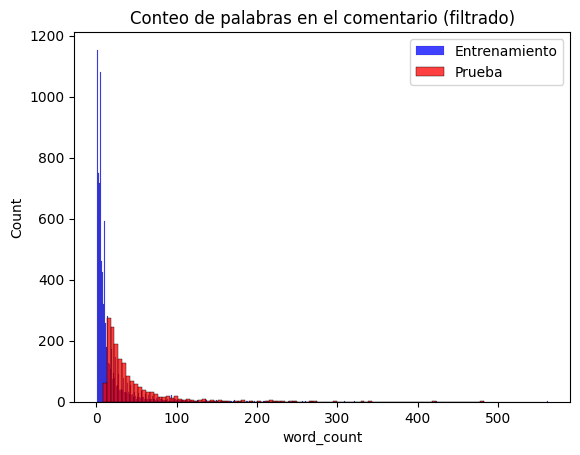

In [27]:
# histogramas del numero de palabras para los conjuntos de entrenamiento y prueba
fig, ax = plt.subplots()
sns.histplot(data=df_train_filt, x='word_count', color='blue', label='Entrenamiento', ax=ax)
sns.histplot(data=df_test_filt, x='word_count', color='red', label='Prueba', ax=ax)
plt.legend()
plt.title('Conteo de palabras en el comentario (filtrado)')
plt.show() 

Notamos que df_test presenta un aceptable número de palabras (>8) en los comentarios, por ende la filtración de datos (por número de palabras) deberia realizarse en df_train.

In [28]:
# revisamos algunos comentarios con pocas palabras
cutoff = 10

# muestras del conjunto de entrenamiento con menos de {cutoff} palabras
df_train_l10 = df_train_filt[((df_train_filt.word_count <= cutoff))]

# mostramos dichos comentarios
for row in df_train_l10.itertuples():
  if row.Index%100==0:
    print(row.Index, row.Topic, row.Comment)

100 Biology forbidden strawberry vanilla ice cream
300 Chemistry reduce concentration tween critical micelle concentration
600 Chemistry yellow powerful red chemistry illiterate noob
800 Biology alfred hitchcock wrong birds squirrels run lives
900 Biology pretty sure ops troll look previous posts
1000 Physics much easier arxiv vs snarxiv
1200 Chemistry co2 carbonic would equilibrium agree soft drinks
1400 Biology today satan
1500 Chemistry called yellowman ireland england
1600 Biology plumbus
1800 Physics mean believe dark matter theory failed explain universe something
2000 Biology thanks helped
2200 Chemistry piperine
2300 Biology never turn back squirrel
2500 Chemistry never abuse lions
2600 Chemistry thanks gonna check
3000 Physics ghostbusters
3100 Chemistry hell hint
3200 Physics thank kind stranger
3300 Chemistry downvote means disagreeing someone disagree terrible answer given downvote easy
3500 Chemistry may know secret one acquire pbi3
3600 Biology could contamenium
3700 Chem

In [29]:
# función que toma aleatoriamente 20 muestras de un dataframe x
sampling_function = lambda x: x.sample(n=20, random_state=42)

# seleccionamos al azar 20 comentarios de 1 palabra, 20 de 2 palabras, ...,
# 20 comentarios de 10 palabras
sampled_df_train = df_train_l10.groupby('word_count').apply(sampling_function).reset_index(drop=True)

In [30]:
# podemos leer cada conjunto de palabras haciendo
n = 10
for index, row in sampled_df_train[sampled_df_train['word_count']==n].iterrows():
    print(row.Topic, row.Comment)

Physics yes avoided assigning vev expansion around point avoid phi phi
Chemistry interested chemistry super heavy elements field study would want go
Biology birds grow really fast mostly look like adults leave nest
Biology organic nature makes natural immunity big pharma makes vaccines trust
Chemistry would chloroform many chemists actually describe pleasant say mind much
Chemistry haha ya lone pair drawing help imagine vsepr shapes easier
Biology bull shit explain armadillo able roll like wheel youtu lbzufzrqyvo
Chemistry yes today bored thought dissolving arm hydrochloric acid nile red
Physics google car video dodgy felt like pr piece veritasium video
Biology 1 wanting preserve organs 2 isopropyl alcohol works well 70
Physics irregardless trolling nature physicists claims providing important fundamental data sus
Biology going youtube look bug bite sting guy see rates one
Biology know guess consciousness develops works comes happens brain rots away
Physics bit lateral rotation view to

Leímos el subconjunto de comentarios anterior para determinar que tan representativo es un comentario con *n* palabras. Establecemos una medida de esa representación como el porcentaje de muestras que pudimos clasificar correctamente basándonos únicamente en el contenido del comentario.

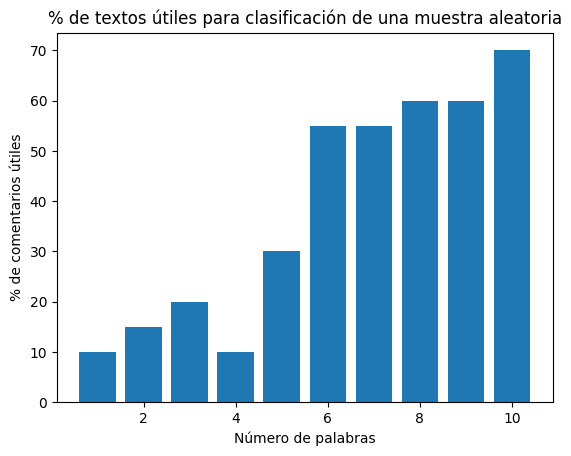

In [31]:
# número de palabras consideradas
n_words = sorted(df_train_l10.word_count.unique().tolist())
# porcentajes determinados
understandable_ratio = [10, 15, 20, 10, 30, 55, 55, 60, 60, 70]

plt.bar(n_words, understandable_ratio)
plt.xlabel('Número de palabras')
plt.ylabel('% de comentarios útiles')
plt.title('% de textos útiles para clasificación de una muestra aleatoria')
plt.show()

In [32]:
# tomando en cuenta el histograma anterior, vemos conveniente
# establecer un limite inferior de 6 palabras por comentario
n_lim_inf = 6
df_train_filt = df_train_filt[df_train_filt['word_count']>=n_lim_inf]

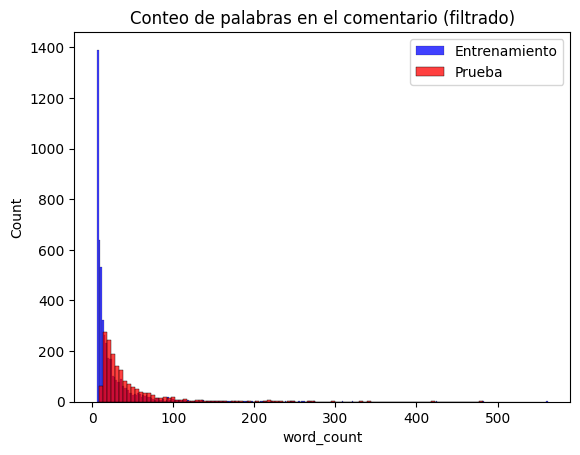

In [33]:
# histogramas del numero de palabras para los conjuntos de entrenamiento y prueba tras la filtracion
fig, ax = plt.subplots()
sns.histplot(data=df_train_filt, x='word_count', color='blue', label='Entrenamiento', ax=ax)
sns.histplot(data=df_test_filt, x='word_count', color='red', label='Prueba', ax=ax)
plt.legend()
plt.title('Conteo de palabras en el comentario (filtrado)')
plt.show() 

[]

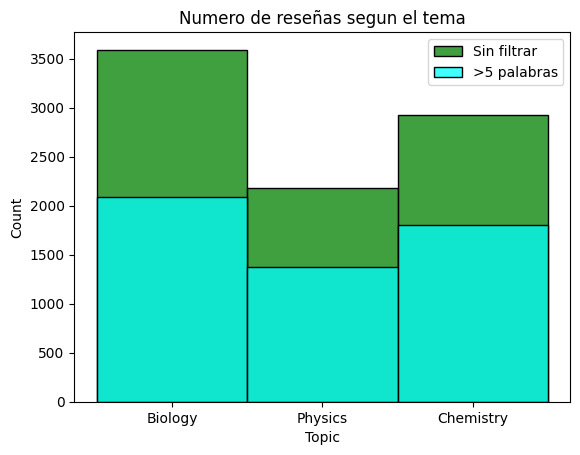

In [34]:
# histograma de los tipos de libro para el conjunto de entrenamiento (antes y despues de filtrar)
fig, ax = plt.subplots()
sns.histplot(data=df_train, x='Topic', color='green', label='Sin filtrar', ax=ax)
sns.histplot(data=df_train_filt, x='Topic', color='cyan', label=f'>{n_lim_inf-1} palabras', ax=ax)
plt.legend()
plt.title('Numero de reseñas segun el tema')
plt.plot()

## Tokenización y Codificación de palabras

La tokenización es el proceso de dividir el texto en unidades más pequeñas, llamadas tokens. Los tokens pueden ser palabras individuales o incluso caracteres. La tokenización ayuda a convertir el texto en una representación estructurada que puede ser procesada por el modelo.

Los modelos de clasificación de textos generalmente requieren que las palabras sean representadas numéricamente. Ambas tareas se pueden llevar a cabo empleando funciones de keras

In [35]:
# modulos para preprocesamiento de texto en keras
'''
Esta clase se utiliza para tokenizar texto y convertirlo en secuencias numéricas.
Asigna un número único, también conocido como "índice", a cada palabra en el texto 
y genera secuencias de estos índices para cada documento o frase.
'''
from tensorflow.keras.preprocessing.text import Tokenizer

'''
Esta función toma una lista de secuencias de diferentes longitudes y 
las convierte en un arreglo de numpy con una longitud uniforme 
al rellenarlas o truncarlas según sea necesario.
'''
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
# tokenizacion usanto las funciones de keras
tokenizer = Tokenizer()                                  # objeto de tokenizacion en keras
tokenizer.fit_on_texts(df_train_filt.Comment.tolist())   # actualiza el vocabulario del tokenizer
word_index = tokenizer.word_index                        # indice de palabras

In [37]:
# estos son los indices de palabras que apareceran en sequences
index_word = {value: key for key, value in word_index.items()}
index_word

{1: 'would',
 2: 'like',
 3: 'one',
 4: 'get',
 5: 'also',
 6: 'think',
 7: 'time',
 8: 'know',
 9: 'people',
 10: 'could',
 11: 'much',
 12: 'even',
 13: 'make',
 14: 'really',
 15: 'good',
 16: 'see',
 17: 'way',
 18: 'water',
 19: 'need',
 20: 'well',
 21: 'use',
 22: '1',
 23: 'energy',
 24: '2',
 25: 'something',
 26: 'work',
 27: 'different',
 28: 'first',
 29: 'chemistry',
 30: 'com',
 31: 'go',
 32: 'things',
 33: 'physics',
 34: 'lot',
 35: 'want',
 36: 'say',
 37: 'sure',
 38: 'still',
 39: 'probably',
 40: 'actually',
 41: 'right',
 42: 'many',
 43: 'going',
 44: 'question',
 45: 'light',
 46: '3',
 47: 'used',
 48: 'enough',
 49: 'yes',
 50: 'may',
 51: 'might',
 52: 'acid',
 53: 'though',
 54: 'body',
 55: 'thing',
 56: 'made',
 57: 'since',
 58: 'look',
 59: 'two',
 60: 'pretty',
 61: 'point',
 62: 'long',
 63: 'find',
 64: 'said',
 65: 'matter',
 66: 'years',
 67: 'new',
 68: 'around',
 69: 'mean',
 70: 'take',
 71: 'maybe',
 72: 'better',
 73: 'never',
 74: 'try',
 75: 

In [38]:
# luego de ajustar el tokenizer a los comentarios que tenemos en el conjunto de entrenamiento
# podemos convertir un texto en una lista de indices de palabras (segun el diccionario de la celda anterior)
_test_sequence = tokenizer.texts_to_sequences(df_train_filt.Comment)
print(df_train_filt.Comment.loc[1])
print('Secuencia de indices:', _test_sequence[1])
# y de la secuencia de indices podemos convertirlo a las palabras que rescata el tokenizer
print('Secuencia de texto:', tokenizer.sequences_to_texts(_test_sequence)[1])

hard believe exist particulars detect anything invented far mean look long took humans find way detect radiation
Secuencia de indices: [131, 164, 433, 9166, 1013, 81, 2383, 137, 69, 58, 62, 400, 275, 63, 17, 1013, 800]
Secuencia de texto: hard believe exist particulars detect anything invented far mean look long took humans find way detect radiation


In [39]:
# elegimos el maximo numero de palabras en los dataset como longitud estandar de las secuencias de indices
max_sequence_length = max([len(seq) for seq in _test_sequence]) 
# uniformizamos la longitud de las secuencias
_padded_sequence = pad_sequences(_test_sequence, maxlen=max_sequence_length)
print(df_train_filt.Comment.loc[1])
print('Secuencia de indices:', _padded_sequence[1])

hard believe exist particulars detect anything invented far mean look long took humans find way detect radiation
Secuencia de indices: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   

# Dividimos el dataset

Tenemos un dataset con diferente numero de muestras para cada clase. Para evitar overfitting al entrenar el modelo, usaremos el mismo numero (1000) de muestras de cada tipo para entrenar el modelo y el resto de muestras serviran para validacion.

In [40]:
# función que toma aleatoriamente 1000 muestras de un dataframe x
sampling_function = lambda x: x.sample(n=1000, random_state=42)

# seleccionamos al azar 1000 muestras de cada categoria para el conjunto de entrenamiento definitivo
df_train_data = df_train_filt.groupby('Topic').apply(sampling_function).reset_index(drop=True)
# el resto de muestras se emplearan para la validacion de los modelos
df_val_data = df_train_filt[~df_train_filt.Id.isin(df_train_data.Id)].dropna()
# renombramos el conjunto de evaluacion
df_test_data = df_test_filt

In [41]:
# convertimos los comentarios a arrays de secuencias de indices
from numpy import array

def token_codify(df):
  sequence = tokenizer.texts_to_sequences(df.Comment)
  padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
  return padded_sequence

x_train = array(token_codify(df_train_data))
x_val = array(token_codify(df_val_data))
x_test = array(token_codify(df_test_data))

In [42]:
# convertimos las categorias en la columna Topic a one hot encoding
# seleccionamos los topicos de nuestra matriz y lo guardamos como x
topic_train = df_train_data['Topic'].tolist()
topic_val = df_val_data['Topic'].tolist()
topic_test = df_test_data['Topic'].tolist()

In [43]:
# convertimos las categorias en la columna Topic a su representacion en one hot encoding
from sklearn.preprocessing import OneHotEncoder
from numpy import array

# creamos el one hot encoder
encoder = OneHotEncoder()

# definimos las categorias
categories = ['Biology', 'Chemistry', 'Physics']
categories = array(categories).reshape(-1, 1)   # redimensionamos

# ajustamos y transformamos las categorias mediante one hot encoding
one_hot_encoded = encoder.fit_transform(categories)

# entrenamiento
y_train = encoder.transform(array(topic_train).reshape(-1,1)).toarray()

# validation
y_val = encoder.transform(array(topic_val).reshape(-1,1)).toarray()

# test
y_test = encoder.transform(array(topic_test).reshape(-1,1)).toarray()

In [44]:
# dimensiones de los conjuntos
print('Entrenamiento', x_train.shape, y_train.shape)
print('Validacion', x_val.shape, y_val.shape)
print('Evaluacion', x_test.shape, y_test.shape)

Entrenamiento (3000, 562) (3000, 3)
Validacion (2267, 562) (2267, 3)
Evaluacion (1586, 562) (1586, 3)


# Costruyendo el Modelo
Ahora Construyamos el modelo de nuestra red neuronal, empecemos por un ejemplo de como hacerlo

In [45]:
# importamos librerias
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, Dropout 
from keras.utils import plot_model
from keras.optimizers import SGD, Adam

# haremos uso de un callback para monitorear el performance del modelo
# EarlyStopping nos sirve para evitar overfitting y ahorrar tiempo entrenando en las epocas necesarias
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',          # Quantity to monitor (e.g., validation loss)
    patience=10,                 # Number of epochs with no improvement before stopping
    restore_best_weights=True    # Whether to restore the weights of the best epoch
)

In [46]:
# definimos una funcion que nos ayudara a construir nuestro modelo
def architecture(input_shape, n_units, activation, dropout=True, p_drop=0):
   '''
   Funcion para construir redes neuronales para un modelo de regresion.
   Args:
     input_shape (tuple) : forma de los valores de entrada
     n_units (str)       : numero de neuronas en las capas ocultas
                           (se pueden incluir cuantas capas se consideren necesarias)
                           deben escribirse como 'n_1,n_2,n_3,...'
     activation (str)    : funcion de activacion para las capas ocultas
     dropout (bool)      : si realizar dropout en las capas ocultas
     p_drop (float)      : fraccion de neuronas en las que se hace dropout
   '''

   # transformamos el string n_units en una lista
   n_units_list = [int(x) for x in n_units.split(",")]
    
   # capa de entrada
   model = Sequential()
   model.add(Input(input_shape))
   
   # capas ocultas
   for i, n in enumerate(n_units_list):
     model.add(Dense(n, kernel_initializer='random_uniform', bias_initializer='zeros', activation=activation, name=f'hl_{i+1}'))
     if dropout == True:
         model.add(Dropout(p_drop))
   
   # capa de salida
   model.add(Dense(3, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros', name='output-layer'))

   return model

In [47]:
# prueba de como funciona 'architecture'
input_shape = (len(x_train[0]))
n_units     = '32,32'
activation  = 'relu'

test_model = architecture(input_shape, n_units, activation, p_drop=0.0)
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hl_1 (Dense)                (None, 32)                18016     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 hl_2 (Dense)                (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output-layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 19,171
Trainable params: 19,171
Non-trainable params: 0
_________________________________________________________________


In [48]:
# debido a que el dataset esta desbalanceado, optamos por otra metrica que no es accuracy
# para evaluar el modelo
precision = tf.keras.metrics.Precision(name='precision')

test_model.compile(optimizer="adam",
              loss='CategoricalCrossentropy',
              metrics=["acc", precision])

In [49]:
# entrenamos nuestro modelo
history = test_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                         epochs=200, verbose=0, shuffle=True, callbacks=[early_stopping])

Exception ignored in: <function _xla_gc_callback at 0x7faeabf7c5e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
KeyboardInterrupt: 


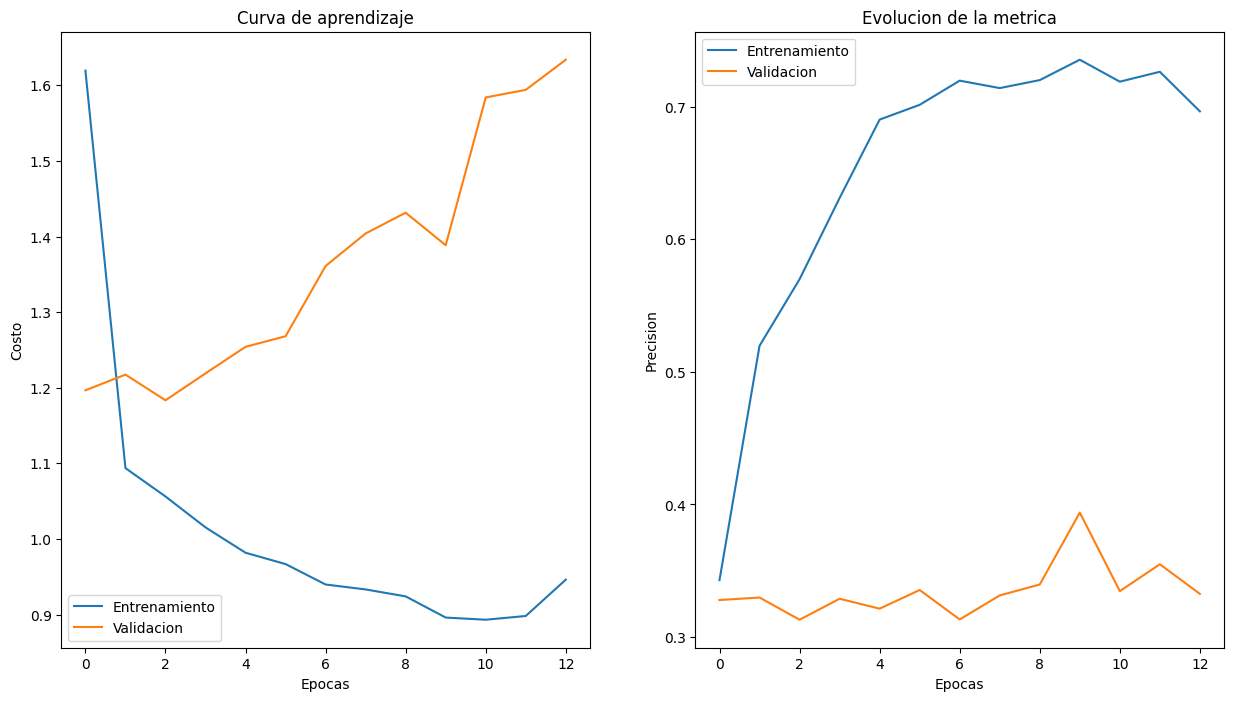

In [50]:
def plot_loss_metrics(history, axes, filename=None):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    prec = history.history['precision']
    val_prec = history.history['val_precision']

    ax = axes[0]
    ax.plot(loss, label='Entrenamiento')
    ax.plot(val_loss, label='Validacion')
    ax.set_xlabel('Epocas')
    ax.set_ylabel('Costo')
    ax.legend()
    ax.set_title('Curva de aprendizaje')

    ax = axes[1]
    ax.plot(prec, label='Entrenamiento')
    ax.plot(val_prec, label='Validacion')
    ax.set_xlabel('Epocas')
    ax.set_ylabel('Precision')
    ax.legend()
    ax.set_title('Evolucion de la metrica')

    if filename!=None:
        plt.savefig(filename, dpi=200)

fig, axes = plt.subplots(1, 2, figsize=(15,8))
plot_loss_metrics(history, axes)
plt.show()

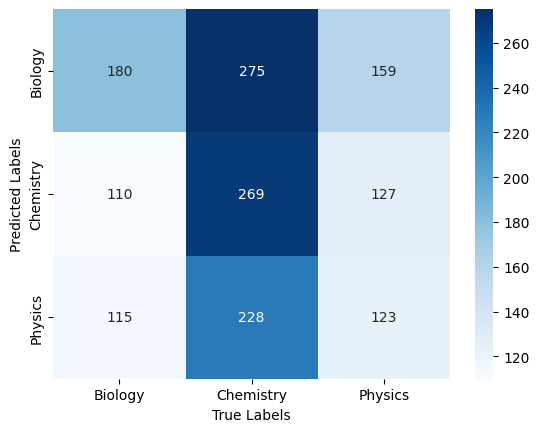

In [51]:
from sklearn.metrics import confusion_matrix
from numpy import argmax

def plot_confussion_matrix(x_test, y_test, model, ax, filename=None):
    true_labels = argmax(y_test, axis=1)

    predicted_probabilities = model.predict(x_test, verbose=0)
    predicted_labels = argmax(predicted_probabilities, axis=1)

    conf_mat = confusion_matrix(true_labels, predicted_labels)

    categories = ['Biology', 'Chemistry', 'Physics']

    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax)
    # Add labels and title
    ax.set_ylabel('Predicted Labels')
    ax.set_xlabel('True Labels')
    if filename!=None:
        plt.savefig(filename, dpi=200)
    
fig, ax = plt.subplots()
plot_confussion_matrix(x_test, y_test, test_model, ax)
plt.show()

## GridSearch para fijar arquitectura e hiperparametros

Empleando TensorBoard vamos a evaluar diferentes arquitecturas e hiperparametros para nuestra red.

In [52]:
# importamos librerias
import numpy as np
from tensorboard.plugins.hparams import api as hp

%matplotlib inline
np.random.seed(1)

In [53]:
# añadimos tensorboard para el análisis de los modelos que vamos a utilizar
%load_ext tensorboard

In [54]:
# limpiamos logs previos
!rm -rf ./logs/ 

In [55]:
# definimos hiperparametros sobre los que se hara el gridsearch
HP_NUM_UNITS    = hp.HParam('n_units', hp.Discrete(['64,64,64','32,64,32,64']))
HP_DROPOUT      = hp.HParam('dropout', hp.Discrete([0.0,0.05,0.1,0.25]))
HP_LEARNINGRATE = hp.HParam('learning_rate', hp.Discrete([0.01, 0.001]))
HP_ACTIVATION   = hp.HParam('activation', hp.Discrete(['relu', 'tanh', 'softplus']))
HP_OPTIMIZER    = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

# la metrica elegida es precision
METRIC_ACCURACY = 'precision'

with tf.summary.create_file_writer('logs_ep/hparam_tuning').as_default():
 hp.hparams_config(
   hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_LEARNINGRATE, HP_ACTIVATION, HP_OPTIMIZER],
   metrics=[hp.Metric(METRIC_ACCURACY, display_name='precision')],
 )

In [56]:
def train_test_model(hparams):
   model = architecture(input_shape=input_shape, n_units=hparams[HP_NUM_UNITS],
                        activation=hparams[HP_ACTIVATION], p_drop=hparams[HP_DROPOUT])
   model.compile(optimizer=hparams[HP_OPTIMIZER], loss='CategoricalCrossentropy', metrics=precision)

   model.optimizer.learning_rate=hparams[HP_LEARNINGRATE]

   model.fit(x_train, y_train, epochs = 30, batch_size = 64, shuffle=True, verbose=0)
   _, accuracy = model.evaluate(x = x_val, y = y_val)
   return accuracy

In [57]:
def training(run_dir, hparams):
   with tf.summary.create_file_writer(run_dir).as_default():
       hp.hparams(hparams)  # record the values used in this trial
       accuracy = train_test_model(hparams)
       tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [58]:
from collections import OrderedDict, namedtuple
from itertools import product
session_num = 0

class RunBuilder():
   @staticmethod
   def get_runs(params):
       Run=namedtuple('Run', params.keys())

       runs=[]

       for v in product(*params.values()):
           runs.append(Run(*v))

       return runs
   
params=OrderedDict(
       num_units = [num_units for num_units in HP_NUM_UNITS.domain.values],
       p_drop    = [dropout_rate for dropout_rate in (HP_DROPOUT.domain.values)],
       lr        = [lr for lr in HP_LEARNINGRATE.domain.values],
       act       = [activation for activation in HP_ACTIVATION.domain.values],
       optim     = [optimizer for optimizer in HP_OPTIMIZER.domain.values],
   )

for run in RunBuilder().get_runs(params):
   hparams = {
         HP_NUM_UNITS: run.num_units,
         HP_DROPOUT: run.p_drop,
         HP_LEARNINGRATE: run.lr,
         HP_ACTIVATION: run.act,
         HP_OPTIMIZER: run.optim
     }
   run_name = "run-%d" % session_num
   print('--- Starting trial: %s' % run_name)
   print({h.name: hparams[h] for h in hparams})
   training('logs/hparam_tuning/' + run_name, hparams)
   session_num += 1

--- Starting trial: run-0
{'n_units': '32,64,32,64', 'dropout': 0.0, 'learning_rate': 0.001, 'activation': 'relu', 'optimizer': 'adam'}


KeyboardInterrupt: ignored

In [ ]:
%tensorboard --logdir logs/hparam_tuning

In [ ]:
# seleccionamos los modelos de mayor precision
hpars = []

for n in [64,128,192,256]:
    _df_hpars = pd.read_csv(f'./hparams/table_{n}.csv')
    df_nlargest = _df_hpars.nlargest(2, ['precision'])
    hpars.append(df_nlargest)

df_hpars = pd.concat(hpars, ignore_index=True)

hpars = df_hpars.values.tolist()
print('Los mejores modelos')
df_hpars

# Creando los modelos con los hiperparametros

In [ ]:
# sin callback
models_sc = []
histories_sc = []
for i, hpar in enumerate(hpars):
    p_drop, n_units, activation, lr, optimizer = hpar[:-1]

    model = architecture(input_shape=input_shape, n_units=n_units, activation=activation, dropout=True, p_drop=p_drop)
    precision = tf.keras.metrics.Precision(name='precision')

    model.compile(optimizer=optimizer,
                loss='CategoricalCrossentropy',
                metrics=["acc", precision])
    
    model.optimizer.learning_rate = lr
    
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size = 64,
                        epochs=200, verbose=0, shuffle=True)
    
    models_sc.append(model)
    histories_sc.append(history)

In [ ]:
# se tienen 8 modelos, en esta celda se pueden visualizar sus curvas de aprendizaje y matrices de confusion
i = 1

model = models_sc[i]
history = histories_sc[i]
hpar = hpars[i]

fig, axes = plt.subplots(1, 3, figsize=(20,6))
plot_loss_metrics(history, axes[:-1])
plot_confussion_matrix(x_test, y_test, model, axes[-1])
plt.suptitle(f'Modelo {i+1}: n_units={hpar[1]}, p_drop={hpar[0]}, activation={hpar[2]}')
plt.savefig(f'./plots/model{i+1}_sin-callback.png', dpi=200)
plt.show()

De los modelos anteriores (ver carpeta plots/model{i}_sin/callback.png), en los primeros 2 se observan grandes oscilaciones en las curvas de validacion (asi como un ligero overfitting). En el tercero las predicciones son muy malas (considerando la curva de la metrica y el confussion matrix). Los modelos restantes presentan un pronunciado overfitting. Para solucionar este problema de los ultimos modelos haremos uso del callback early stopping.

In [ ]:
# con callback
models = []
histories = []
for i, hpar in enumerate(hpars):
    p_drop, n_units, activation, lr, optimizer = hpar[:-1]

    model = architecture(input_shape=input_shape, n_units=n_units, activation=activation, dropout=True, p_drop=p_drop)
    precision = tf.keras.metrics.Precision(name='precision')

    model.compile(optimizer=optimizer,
                loss='CategoricalCrossentropy',
                metrics=["acc", precision])
    
    model.optimizer.learning_rate = lr
    
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                        epochs=100, verbose=0, shuffle=True, callbacks=[early_stopping])
    
    models.append(model)
    histories.append(history)

In [ ]:
# se tienen 8 modelos, en esta celda se pueden visualizar sus curvas de aprendizaje y matrices de confusion
i = 1

model = models[i]
history = histories[i]
hpar = hpars[i]

fig, axes = plt.subplots(1, 3, figsize=(20,6))
plot_loss_metrics(history, axes[:-1])
plot_confussion_matrix(x_test, y_test, model, axes[-1])
plt.suptitle(f'Modelo {i+1}: n_units={hpar[1]}, p_drop={hpar[0]}, activation={hpar[2]}')
plt.savefig(f'./plots/model{i+1}_con-callback.png', dpi=200)
plt.show()

In [ ]:
from sklearn.metrics import precision_score

# evaluamos los modelos a partir de la metrica de precision
def evaluate_precision(x_test, y_test, model):
    # hacemos predicciones de probabilidades en los datos de prueba
    y_pred_probs = model.predict(x_test, verbose=0)
    # convertimos las probabilidades en categorias predecidas
    y_pred = np.argmax(y_pred_probs, axis=1)
    # calculamos la precision
    # to evaluate the performance of the model on each individual category separately, 
    # you can compute the precision for each class and then take the average
    precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='macro')
    print("\tPrecision:", precision)   
    return precision 

print('Evaluamos la precision de los modelos')
prec_list = []
for i, model in enumerate(models):
    hpar = hpars[i]
    print(f'Modelo {i+1}: n_units={hpar[1]}, p_drop={hpar[0]}, activation={hpar[2]}')
    _ = evaluate_precision(x_test, y_test, model)
    prec_list.append(_)

print('\nEl modelo con mayor precision es')
valor_maximo = max(prec_list)
indice_maximo = prec_list.index(valor_maximo)
print(f'Modelo {indice_maximo+1}: n_units={hpars[indice_maximo][1]}, p_drop={hpars[indice_maximo][0]}, activation={hpars[indice_maximo][2]}')
print(f'con una precision de {prec_list[indice_maximo]}')

# Comparamos con otro tipo de modelo de Machine Learning

In [ ]:
#Cargamos librerias
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# desde drive
path_train = '/content/drive/MyDrive/dl-intro/train.csv'

df_train = pd.read_csv(path_train)

In [ ]:
#Renombramos columnas para que el modelo no tenga problemas
df_1 = df_train.rename(columns={'Comment':'text',
                                   'Topic':'clase'})

In [ ]:
#Dividimos la base de datos en train y test del archivo train.cvs
X = df_1['text'].values
y = df_1['clase'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Se crea una instancia del vectorizador TF-IDF para convertir los textos en representaciones numéricas:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
#Se entrena un modelo de clasificación de SVC con los datos vectorizados
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

In [ ]:
#Hacemos la prueba y se ekaborá un reporte
y_pred = svm_model.predict(X_test_vectorized)
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
#Importamos librerias
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Creamos una matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
# Crea un mapa de calor para visualizar la matriz de confusión
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular las predicciones del modelo SVM
y_pred = svm_model.predict(X_test_vectorized)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Precisión del modelo: ", accuracy)


Recordemos que nuestro objetivo es clasificar correctamente los libros segun su tema. Es asi que la metrica elegida fue la de precision, la cual mide la proporción de ejemplos clasificados correctamente como positivos entre todos los ejemplos clasificados como positivos por el modelo. Se calcula dividiendo los verdaderos positivos entre la suma de verdaderos positivos y falsos positivos.

Precision = Verdaderos positivos / (Verdaderos positivos + Falsos positivos)

Accuracy no fue elegido porque estamos lidiando con una base de datos desbalanceada. Notamos que aunque se hicieron muchos esfuerzos, proponiendo diferentes hiperparametros y arquitecturas, no fue posible clasificar correctamente los libros segun su tema (prueba de ello es haber obtenido un bajo valor en la metrica de los modelos).

## Comentarios respecto a nuestra propuesta de construccion del modelo

- Nuestros esfuerzos se concentraron en el filtrado y preprocesamiento de los textos a analizar. Se encontraron muchos comentarios que no brindaban informacion significativa que permitiera clasificar los textos (sin sentido, con emojis, con urls, etc). Este filtrado redujo significativamente la informacion a incluir en el texto asi como el tamaño del dataset (que de por sí era pequeño para esta tarea).
- El desbalance en los tipos de texto a clasificar se hizo evidente tanto en el dataset de entrenamiento como en el de prueba. Es asi que se opto por entrenar nuestro modelo con un subconjunto del dataset original que contuviera la misma proporción de textos de cada clase.
- Lamentablemente no pudimos encontrar un modelo que clasificara correctamente los textos.
- Algunas de las soluciones que proponemos para mejorar la performance de los modelos que pudieran proponerse para esta tarea:
    - Resulta necesario incrementar la base de datos de entrenamiento: Intuitivamente la mejor forma de clasificar textos cientificos es a partir de los conceptos propios de cada area (por ejemplo en física se tienen las palabras clave electromagnetismo, mecánica, cuántica, movimiento, rotación, ...). Sin embargo, en los textos proporcionados estas palabras no eran tan frecuentes como otras palabras de uso común. Si entrenaramos la red con mas muestras de cada tipo, los conceptos clave tomarian mayor relevancia en el modelo.
    - Rediseñar la eliminación de palabras de uso común: en este notebook se eliminaron dichas palabras haciendo uso de una librería, sin embargo algunas palabras quedaron sin eliminar (except, would, ...) y formaron parte del conjunto de palabras que servia de entrada para el modelo.

Comparando nuestro modelo con mayor precisión que fue de 0.3753 con el de OpenIA con precisión de 0.7245, podemos ver que no fue suficiente, concluimos que uno de los errores que se cometio en elaborar este modelo fue en el procesamiento de datos